<a href="https://colab.research.google.com/github/PavloIeremeiew/MachineLearning/blob/main/Lab6_ML_Yeremeiev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix,silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [3]:
uploaded = files.upload()

Saving possum.csv to possum.csv


In [16]:
df = pd.read_csv("possum.csv")
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [29]:
df.value_counts("sex")

,count
sex,
1,59
0,42


In [21]:
df.value_counts("Pop")

,count
Pop,
0,58
1,46


In [19]:
df['sex'] = df['sex'].map({'m':1, 'f':0})
df['Pop'] = df['Pop'].map({'Vic':1, 'other':0})

In [24]:
df.dtypes

,0
case,int64
site,int64
Pop,int64
sex,int64
age,float64
hdlngth,float64
skullw,float64
totlngth,float64
taill,float64
footlgth,float64


In [27]:
df.isnull().sum()

,0
case,0
site,0
Pop,0
sex,0
age,0
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,0


In [26]:
df.dropna(inplace=True)

In [28]:
df.describe()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,52.762376,3.673267,0.425743,0.584158,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,30.573894,2.366892,0.496921,0.495325,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,1.000000,1.000000,0.000000,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,26.000000,1.000000,0.000000,0.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,54.000000,4.000000,0.000000,1.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,79.000000,6.000000,1.000000,1.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,104.000000,7.000000,1.000000,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [30]:
df.value_counts("site")

,count
site,
1,33
7,18
5,13
6,13
2,10
3,7
4,7


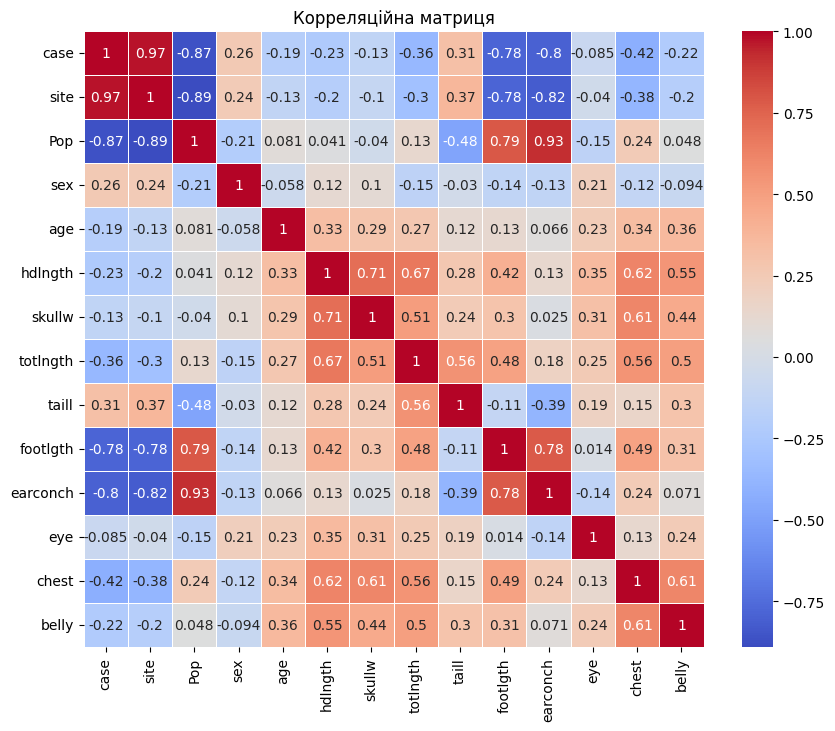

In [33]:
m_corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(m_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляційна матриця')
plt.show()


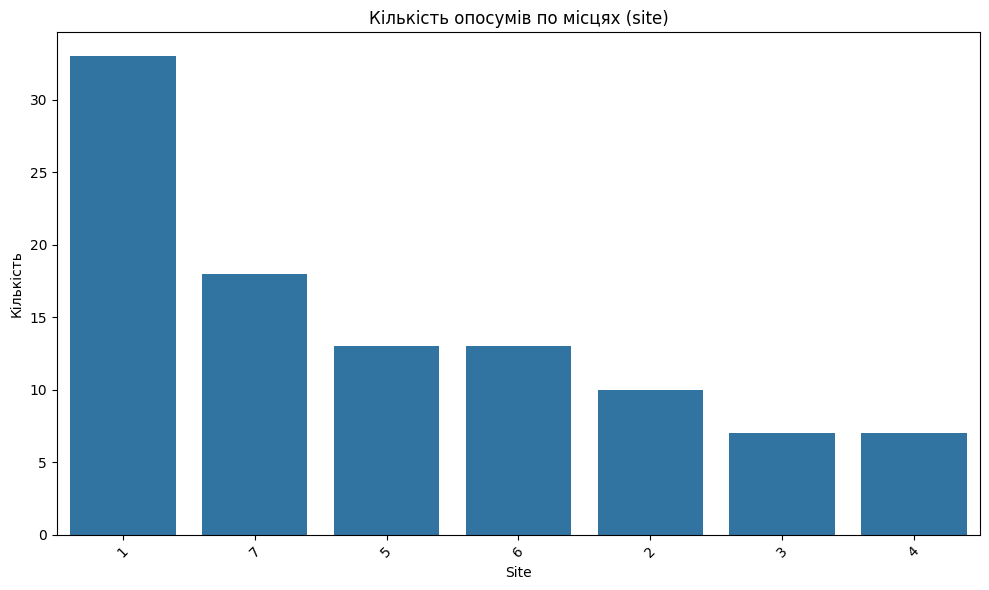

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='site', order=df['site'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Кількість опосумів по місцях (site)')
plt.xlabel('Site')
plt.ylabel('Кількість')
plt.tight_layout()
plt.show()

In [35]:
features = df[['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]
features

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...
99,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

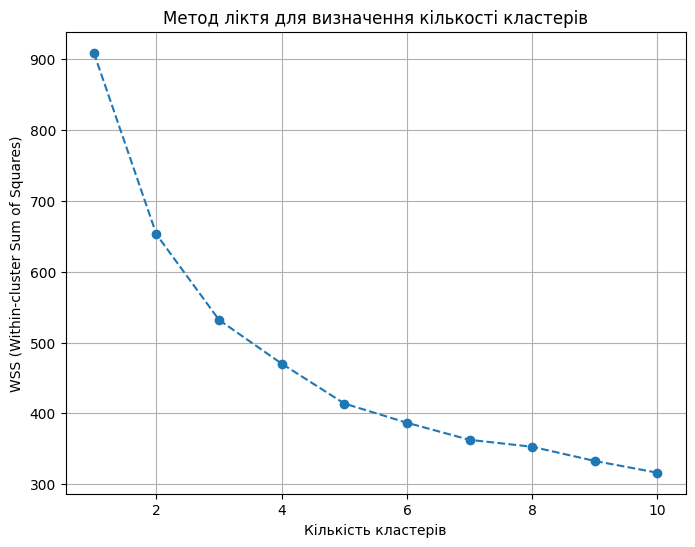

In [39]:
# Метод ліктя для визначення оптимальної кількості кластерів
wss = []  # Внутрішня дисперсія (WSS)
for i in range(1, 11):  # Перевіряємо для 1-10 кластерів
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wss.append(kmeans.inertia_)

# Побудова графіка ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wss, marker='o', linestyle='--')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('WSS (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

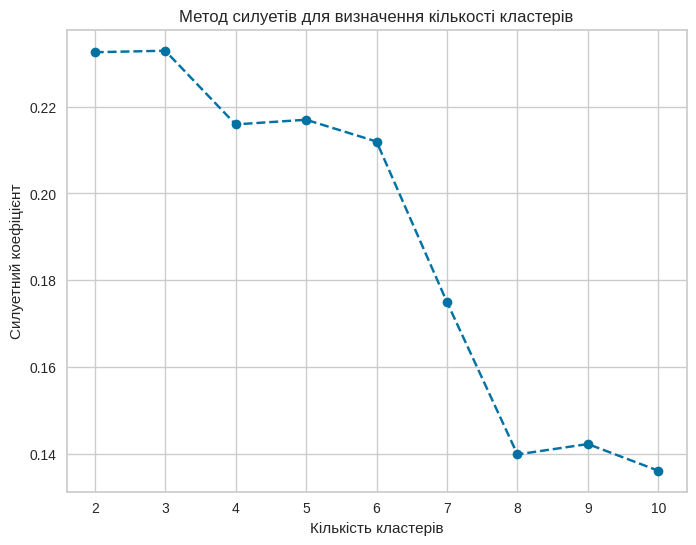

In [46]:
# Метод силуетів для визначення оптимальної кількості кластерів
silhouette_scores = []  # Силуетний коефіцієнт
for i in range(2, 11):  # Починаємо з 2 кластерів, бо для 1 неможливо обчислити силует
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Побудова графіка силуетів
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів для визначення кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Силуетний коефіцієнт')
plt.grid(True)
plt.show()

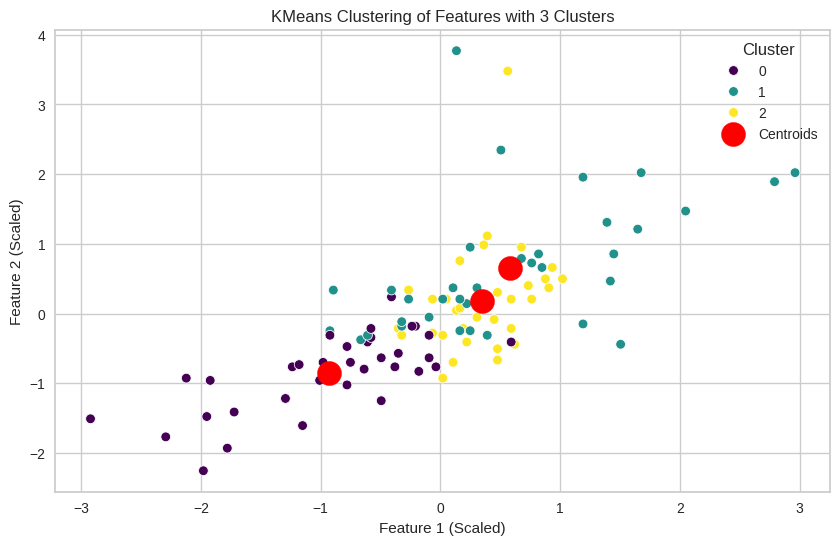

In [47]:
# Використання KMeans для кластеризації (3 кластери)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')

# Додавання центроїдів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

# Настроювання графіка
plt.title('KMeans Clustering of Features with 3 Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

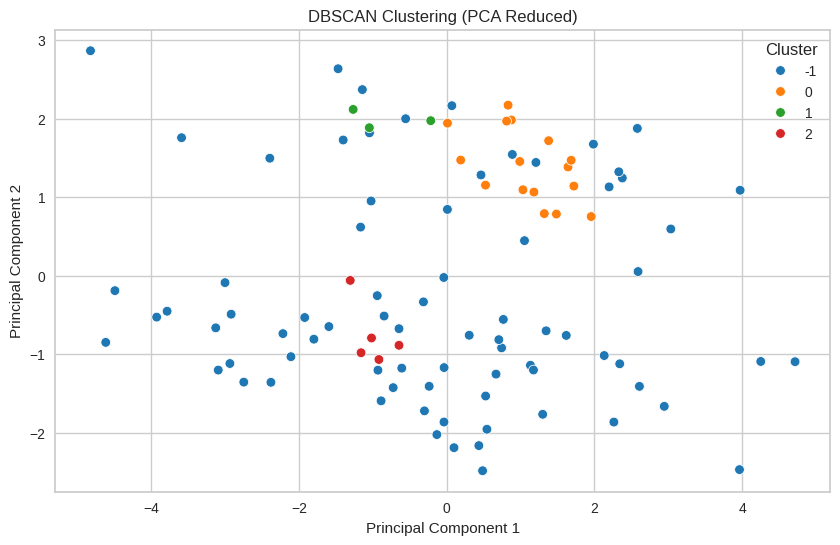

In [52]:
# DBSCAN кластеризація
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters_db = dbscan.fit_predict(X_scaled)

# Зменшення розмірності для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Візуалізація результатів DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_db, palette='tab10', legend='full')

plt.title('DBSCAN Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

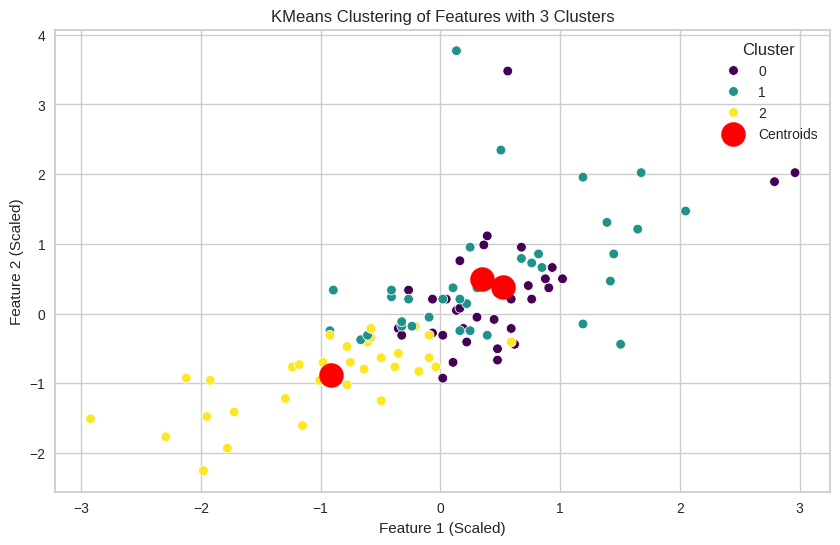

In [56]:
# Використання KMeans для кластеризації (3 кластери)
kmeans = MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Візуалізація кластерів
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')

# Додавання центроїдів
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

# Настроювання графіка
plt.title('KMeans Clustering of Features with 3 Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Висновок:

 в даній роботі було:
 1. проаналізовано дані датасету про опосумів
 2. прибрано порожні значення
 3. розроблено Корреляційну матрицю
 4. промаштабовано значення
 5. виконано аналіз кількості кластерів різними методами
 6. розділено датасет на 3 класери різними методами